# Scrubbing Data
This notebook describes the process of scrubbing data where we turn qualitative data into quantitative

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/telco_customer_churn_dataset.csv")
pd.set_option("display.max_columns", None)

In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4810,1112-CUNAO,Female,1,No,No,15,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,89.85,1424.95,Yes
5042,1561-BWHIN,Male,0,Yes,Yes,19,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.80,344.5,No
2758,2439-QKJUL,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,109.8,No
3835,8194-PEEBY,Female,0,Yes,Yes,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,533.5,No
2346,0020-INWCK,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),95.75,6849.4,No
6949,3648-GZPHF,Male,0,Yes,Yes,32,No,No phone service,DSL,No,No,Yes,Yes,No,No,One year,Yes,Mailed check,36.25,1151.05,No
3363,3474-BAFSJ,Male,0,Yes,No,57,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),57.50,3265.95,No
3090,2386-LAHRK,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,53.50,53.5,Yes
4563,4547-KQRTM,Female,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.05,830.7,Yes
2591,8384-FZBJK,Female,0,Yes,Yes,57,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.60,5611.7,No


## Getting to know the data types of each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total charges is an object instead of being float64 like MonthlyCharges we suspect there could be missing data in the columns

## Parsing strings into numbers

In [ ]:
# This method changes string data to numeric, if a data cannot be parsed into numbers we will replace it with NaN. (Not a Number)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Turning Yes/No data into 1/0 (Binary)

In [ ]:
# Use map method to repalce Yes/No to 1/0
binary_columns = ["Partner", "Dependents", "PaperlessBilling", "Churn"]
for column in binary_columns:
  df[column] = df[column].map({"No": 0, "Yes": 1})

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [ ]:
df["MultipleLines"] = df["MultipleLines"].map({"No": 0, "Yes": 1, "No phone service": 0})

In [ ]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df["OnlineSecurity"] = df["OnlineSecurity"].map({"No": 0, "Yes": 1, "No internet service": 0})

## Splitting multiple data into columns with binary values
In this section, we explore the way to convert categorical data into multiple dummy columns

In [ ]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
#Using get_dummies method to convet categorical data into multiple dummy columns
df = pd.get_dummies(data=df, columns = ["InternetService"])

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,No,0,0,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,5575-GNVDE,Male,0,0,0,34,Yes,0,1,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,3668-QPYBK,Male,0,0,0,2,Yes,0,1,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,No,0,1,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,Yes,0,0,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0


# Assignment - Continue Cleaning Data 

In [ ]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.421837,0.286668,0.592219,64.761692,2283.300441,0.265370,0.343746,0.439585,0.216669
std,0.368612,0.499748,0.458110,24.559481,0.493888,0.452237,0.491457,30.090047,2266.771362,0.441561,0.474991,0.496372,0.412004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
6843,9940-HPQPG,Female,0,1,0,9,Yes,1,1,Yes,Yes,No,No,No,Month-to-month,0,Bank transfer (automatic),91.75,865.80,1,0,1,0
3345,1335-HQMKX,Female,0,1,0,72,Yes,1,0,Yes,Yes,No,Yes,Yes,One year,1,Electronic check,101.35,7323.15,0,0,1,0
6514,6166-YIPFO,Male,0,1,0,72,No,0,1,Yes,Yes,Yes,Yes,Yes,Two year,1,Electronic check,64.70,4746.05,0,1,0,0
4749,6633-MPWBS,Male,0,0,0,5,Yes,0,0,No,No,Yes,No,No,Month-to-month,1,Electronic check,49.20,216.90,1,1,0,0
1444,5514-YQENT,Male,0,0,1,41,Yes,0,1,Yes,Yes,Yes,Yes,Yes,Two year,1,Electronic check,111.15,4507.15,0,0,1,0
5061,4135-FRWKJ,Female,1,1,1,55,Yes,1,1,No,Yes,Yes,Yes,No,One year,0,Electronic check,76.25,4154.55,0,1,0,0
2195,9891-NQDBD,Female,0,1,0,28,Yes,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check,25.55,672.20,0,0,0,1
1292,8390-FESFV,Female,0,0,0,62,Yes,1,0,Yes,Yes,Yes,Yes,Yes,Two year,0,Bank transfer (automatic),84.50,5193.20,0,1,0,0
6614,4086-WITJG,Male,0,1,1,71,Yes,0,0,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),19.70,1301.10,0,0,0,1
4615,9499-XPZXM,Female,0,1,0,72,Yes,1,1,Yes,No,Yes,No,No,Two year,0,Bank transfer (automatic),64.75,4804.75,0,1,0,0


In [ ]:
cols = ["gender", "PhoneService", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

In [ ]:
d_type = [df[_].unique() for _ in cols]
d_type

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Yes', 'No', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object)]

In [ ]:
for _ in cols:
    df[_] = df[_].map({"Female": 0 , "Male": 1, "Yes": 1, "No": 0, "No internet service": 0})

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0
5,9305-CDSKC,0,0,0,0,8,1,1,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,0,1,0
6,1452-KIOVK,1,0,0,1,22,1,1,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,0,1,0
7,6713-OKOMC,0,0,0,0,10,0,0,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0,1,0,0
8,7892-POOKP,0,0,1,0,28,1,1,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,0,1,0
9,6388-TABGU,1,0,0,1,62,1,0,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,1,0,0


In [ ]:
cols = ["Contract", "PaymentMethod"]
d_type = [df[_].unique() for _ in cols]
d_type

[array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
        'Credit card (automatic)'], dtype=object)]

In [ ]:
df = pd.get_dummies(data = df, columns = cols)

## Checking the final dataframe

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0
5,9305-CDSKC,0,0,0,0,8,1,1,0,0,1,0,1,1,1,99.65,820.50,1,0,1,0,1,0,0,0,0,1,0
6,1452-KIOVK,1,0,0,1,22,1,1,0,1,0,0,1,0,1,89.10,1949.40,0,0,1,0,1,0,0,0,1,0,0
7,6713-OKOMC,0,0,0,0,10,0,0,1,0,0,0,0,0,0,29.75,301.90,0,1,0,0,1,0,0,0,0,0,1
8,7892-POOKP,0,0,1,0,28,1,1,0,0,1,1,1,1,1,104.80,3046.05,1,0,1,0,1,0,0,0,0,1,0
9,6388-TABGU,1,0,0,1,62,1,0,1,1,0,0,0,0,0,56.15,3487.95,0,1,0,0,0,1,0,1,0,0,0


In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.265370,0.343746,0.439585,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.441561,0.474991,0.496372,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

We could see all qualitative data are converted into quantitative data for EDA

# EDA on the Dataset Part 2


## Finding correlations from the Heatmap



<AxesSubplot:>

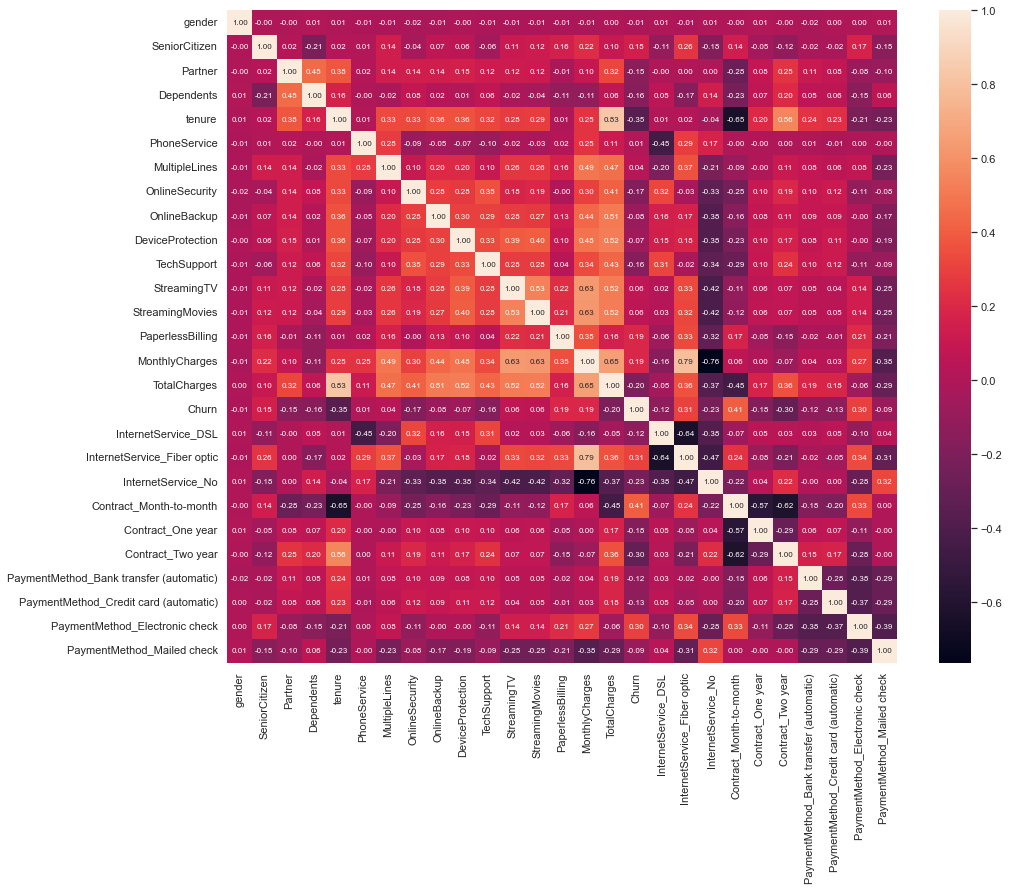

In [ ]:
corr = df.corr()
sns.set(rc ={"figure.figsize": (15,12)})
sns.heatmap(corr, annot = True, fmt = ".2f", annot_kws = {"fontsize": 8})

From the heatmap, we study the correlation of each data to Churn


In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.265370,0.343746,0.439585,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.441561,0.474991,0.496372,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='Partner', ylabel='count'>

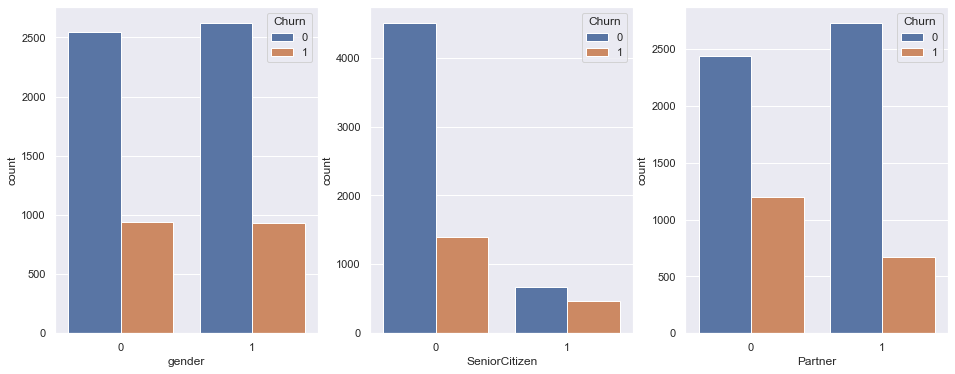

In [ ]:
main, subplots = plt.subplots(1,3, figsize = (16,6))
sns.countplot(data = df, x = "gender", hue = "Churn", ax = subplots[0])
sns.countplot(data = df, x = "SeniorCitizen", hue = "Churn", ax = subplots[1])
sns.countplot(data = df, x = "Partner", hue = "Churn", ax = subplots[2])

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

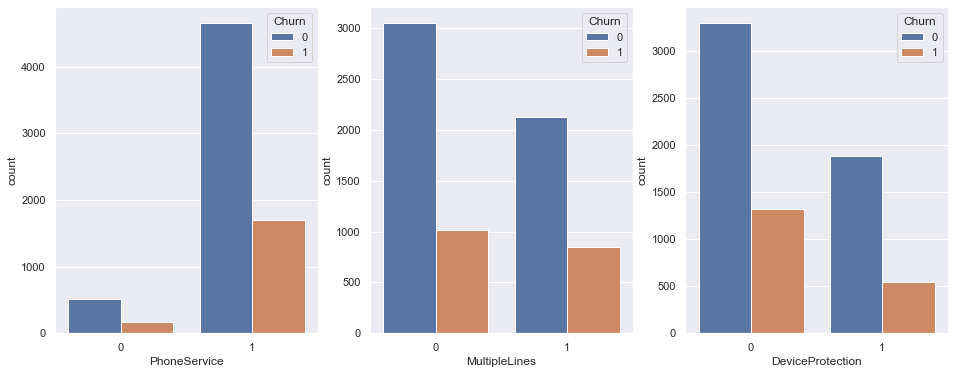

In [ ]:
main, subplots = plt.subplots(1,3, figsize = (16,6))
sns.countplot(data = df, x = "PhoneService", hue = "Churn", ax = subplots[0])
sns.countplot(data = df, x = "MultipleLines", hue = "Churn", ax = subplots[1])
sns.countplot(data = df, x = "DeviceProtection", hue = "Churn", ax = subplots[2])

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

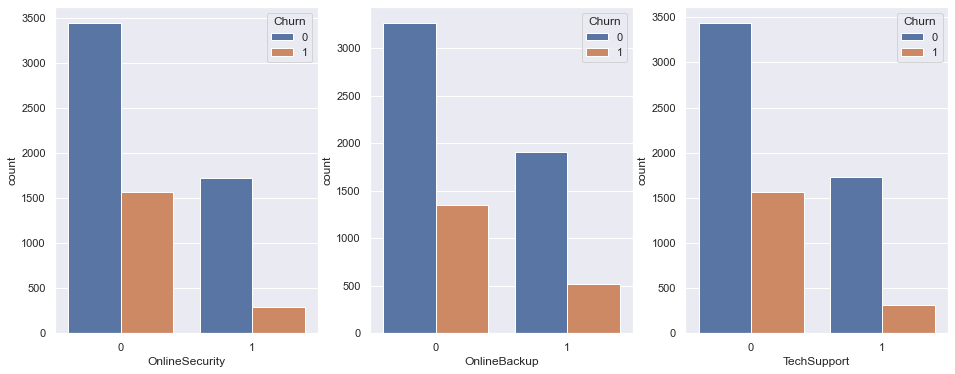

In [ ]:
main, subplots = plt.subplots(1,3, figsize = (16,6))
sns.countplot(data = df, x = "OnlineSecurity", hue = "Churn", ax = subplots[0])
sns.countplot(data = df, x = "OnlineBackup", hue = "Churn", ax = subplots[1])
sns.countplot(data = df, x = "TechSupport", hue = "Churn", ax = subplots[2])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

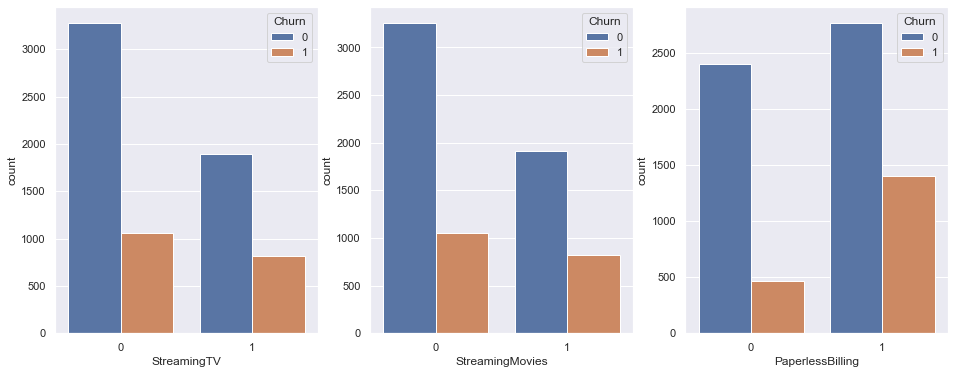

In [ ]:
main, subplots = plt.subplots(1,3, figsize = (16,6))
sns.countplot(data = df, x = "StreamingTV", hue = "Churn", ax = subplots[0])
sns.countplot(data = df, x = "StreamingMovies", hue = "Churn", ax = subplots[1])
sns.countplot(data = df, x = "PaperlessBilling", hue = "Churn", ax = subplots[2])

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

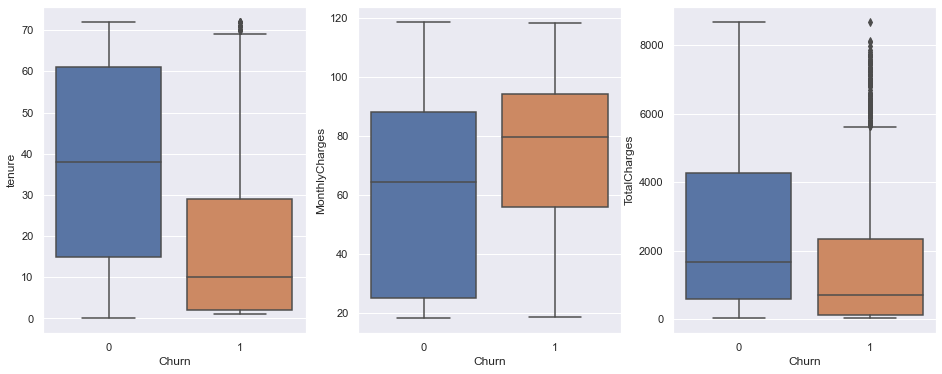

In [ ]:
main, subplots = plt.subplots(1,3, figsize = (16,6))
sns.boxplot(data = df, x = "Churn", y = "tenure", ax = subplots[0])
sns.boxplot(data = df, x = "Churn", y = "MonthlyCharges", ax = subplots[1])
sns.boxplot(data = df, x = "Churn", y = "TotalCharges", ax = subplots[2])

# Making a Decision Tree Classification Model


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

In [ ]:
df = df.dropna()

In [ ]:
cols = ["SeniorCitizen", "Partner", "PhoneService", "DeviceProtection", "OnlineSecurity", "OnlineBackup", "TechSupport", "PaperlessBilling",
        "tenure", "MonthlyCharges", "TotalCharges"]

In [ ]:
train_data = df[cols]
train_labels = df["Churn"]

In [ ]:
train_data

,SeniorCitizen,Partner,PhoneService,DeviceProtection,OnlineSecurity,OnlineBackup,TechSupport,PaperlessBilling,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,0,1,0,1,1,29.85,29.85
1,0,0,1,1,1,0,0,0,34,56.95,1889.50
2,0,0,1,0,1,1,0,1,2,53.85,108.15
3,0,0,0,1,1,0,1,0,45,42.30,1840.75
4,0,0,1,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,0,1,1,24,84.80,1990.50
7039,0,1,1,1,0,1,0,1,72,103.20,7362.90
7040,0,1,0,0,1,0,0,1,11,29.60,346.45
7041,1,1,1,0,0,0,0,1,4,74.40,306.60


## Evaluating Model Accuracy

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(train_data, train_labels, test_size = 0.3, random_state = 1)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7943127962085308


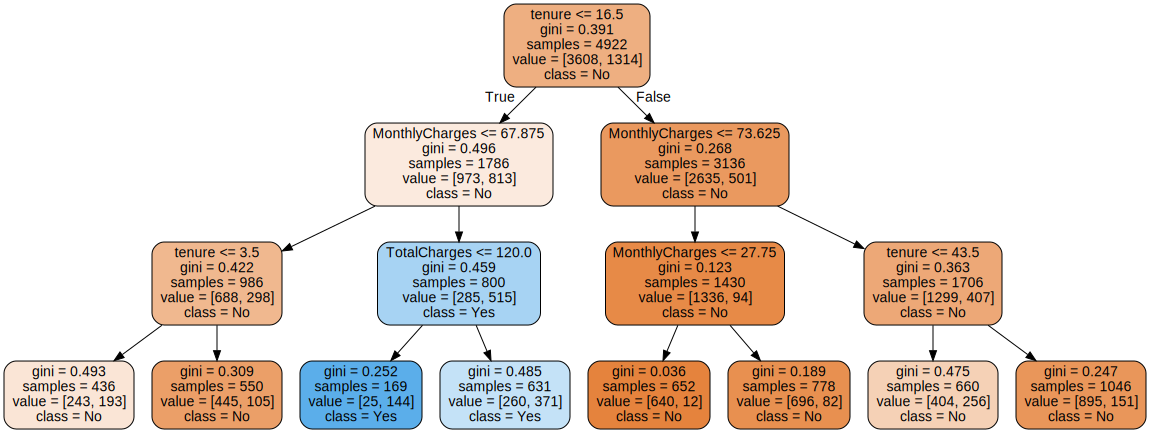

In [ ]:
import graphviz
columns = list(train_data.columns)
dot_data = tree.export_graphviz(model, out_file = None, feature_names = columns, class_names = ["No", "Yes"], filled = True, rounded = True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
df_predict = train_data.iloc[0:0].copy()
df_predict

,SeniorCitizen,Partner,PhoneService,DeviceProtection,OnlineSecurity,OnlineBackup,TechSupport,PaperlessBilling,tenure,MonthlyCharges,TotalCharges


In [ ]:
df_predict = df_predict.append({
    "SeniorCitizen": 0,
    "Partner": 0,
    "PhoneService": 1,
    "DeviceProtection": 1,
    "OnlineSecurity": 0,
    "OnlineBackup": 0,
    "TechSupport": 1,
    "PaperlessBilling": 1,
    "tenure": 12,
    "MonthlyCharges": 50,
    "TotalCharges": 70,
    },ignore_index = True)

C:\Users\CJY\AppData\Local\Temp\ipykernel_3140\4060774871.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict = df_predict.append({


In [ ]:
df_predict

,SeniorCitizen,Partner,PhoneService,DeviceProtection,OnlineSecurity,OnlineBackup,TechSupport,PaperlessBilling,tenure,MonthlyCharges,TotalCharges
0,0,0,1,1,0,0,1,1,12,50.0,70.0


In [ ]:
model.predict(df_predict)

array([0], dtype=int64)

# Improving Model Accuracy


In [ ]:
# Finding data that have a storng positive correlation to Churn
corr[(corr["Churn"] > 0.2)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,-0.171226,-0.082255,-0.066160,-0.164674,0.063228,0.061382,0.191825,0.193356,-0.199484,1.000000,-0.124214,0.308020,-0.227890,0.405103,-0.177820,-0.302253,-0.117937,-0.134302,0.301919,-0.091683
InternetService_Fiber optic,-0.011286,0.255338,0.000304,-0.165818,0.019720,0.289999,0.366083,-0.030696,0.165651,0.176049,-0.020492,0.329349,0.322923,0.326853,0.787066,0.360769,0.308020,-0.640987,1.000000,-0.465793,0.244164,-0.076324,-0.211526,-0.022624,-0.050077,0.336410,-0.306834
Contract_Month-to-month,-0.003386,0.138360,-0.280865,-0.231720,-0.645561,-0.000742,-0.088203,-0.246679,-0.164172,-0.225662,-0.285241,-0.112282,-0.116633,0.169096,0.060165,-0.446776,0.405103,-0.065509,0.244164,-0.218639,1.000000,-0.568744,-0.622633,-0.179707,-0.204145,0.331661,0.004138
PaymentMethod_Electronic check,0.000752,0.171718,-0.083852,-0.150642,-0.208363,0.003062,0.083618,-0.112338,-0.000408,-0.003351,-0.114839,0.144626,0.137966,0.208865,0.271625,-0.060436,0.301919,-0.104418,0.336410,-0.284917,0.331661,-0.109130,-0.282138,-0.376762,-0.373322,1.000000,-0.387372


In [ ]:
# Finding data that have a storng positive correlation to Churn
corr[(corr["Churn"] < -0.2)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.825880,-0.352229,0.013274,0.019720,-0.039062,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
InternetService_No,0.006026,-0.182742,0.000615,0.139812,-0.039062,0.172209,-0.210564,-0.333403,-0.381593,-0.380754,-0.336298,-0.415552,-0.418675,-0.321013,-0.763557,-0.374878,-0.227890,-0.380635,-0.465793,1.000000,-0.218639,0.038004,0.218278,-0.002113,0.001030,-0.284917,0.321361
Contract_Two year,-0.003695,-0.117000,0.248091,0.204613,0.558533,0.003519,0.106253,0.191773,0.111400,0.165096,0.240824,0.072049,0.073960,-0.147889,-0.074681,0.358036,-0.302253,0.031714,-0.211526,0.218278,-0.622633,-0.289510,1.000000,0.154471,0.173265,-0.282138,-0.004705


In [ ]:
cols = df.columns.drop(['Churn', 'customerID', 'gender','PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'])
cols

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
      dtype='object')

Using my domain knowledge, features like gender, customerID and payment methods are unlikey to relate to churn hence removed from the training data.

In [ ]:
train_data = df[cols]
train_labels = df["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(train_data, train_labels, test_size = 0.3, random_state = 1)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = model.predict(X_test)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7976303317535545


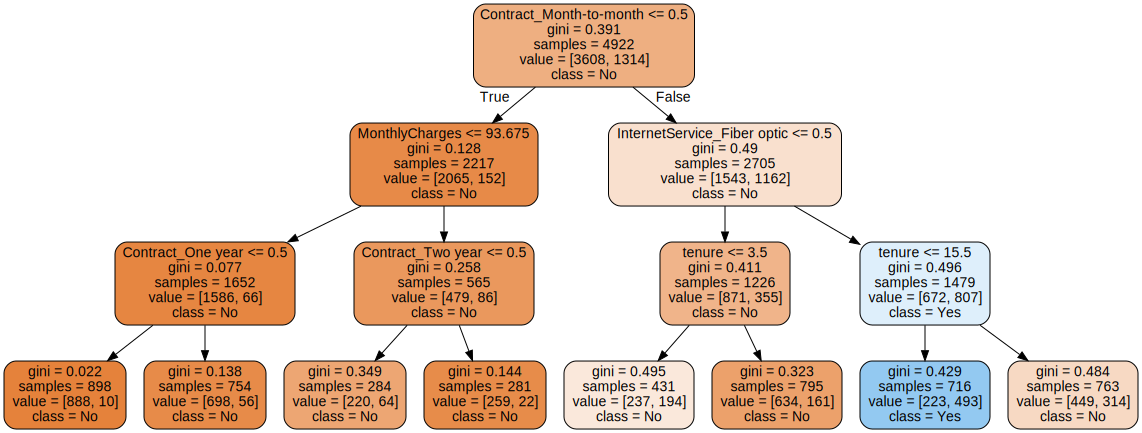

In [ ]:
import graphviz
columns = list(train_data.columns)
dot_data = tree.export_graphviz(model, out_file = None, feature_names = columns, class_names = ["No", "Yes"], filled = True, rounded = True)
graph = graphviz.Source(dot_data)
graph